# **BU425**
# Predicting the churn rate for the stremaing services 

## **Plan**
  1. Business Problem
  2. Explolatory Data Anlaysis 
  3. Modeling 








In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

file_path = 'Streaming.csv' 
df = pd.read_csv(file_path)
df.columns = df.columns.str.replace(' ', '', regex=False)

# Explolatory Data Analysis 

The dataset contains information about 5,000 customers and includes the following 12 variables:

Customer_ID: A unique identifier for each customer (object type).

Age: The age of the customer (float64), with some missing values.

Gender: The gender of the customer (object type).

Subscription_Length: The length of time (in months) the customer has been subscribed (int64).

Region: The region where the customer is located (object type).

Payment_Method: The method used by the customer to make payments (object type).

Support_Tickets_Raised: The number of support tickets raised by the customer (int64).

Satisfaction_Score: A score indicating customer satisfaction (float64), with some missing values.

Discount_Offered: The discount offered to the customer (float64).

Last_Activity: The number of days since the customer last interacted with the service (int64).

Monthly_Spend: The amount spent by the customer per month (float64).

Churned: Indicates whether the customer has churned (1 = yes, 0 = no) (int64).

In [2]:
#display data types 
df
print(df.dtypes)
print(df.head(5))

Customer_ID                object
Age                       float64
Gender                     object
Subscription_Length         int64
Region                     object
Payment_Method             object
Support_Tickets_Raised      int64
Satisfaction_Score        float64
Discount_Offered          float64
Last_Activity               int64
Monthly_Spend             float64
Churned                     int64
dtype: object
  Customer_ID   Age  Gender  Subscription_Length Region Payment_Method  \
0  CUST000001  56.0    Male                   54  South         PayPal   
1  CUST000002  69.0  Female                   21   East     Debit Card   
2  CUST000003  46.0  Female                   49   East         PayPal   
3  CUST000004  32.0    Male                   47   West     Debit Card   
4  CUST000005  60.0    Male                    6   East    Credit Card   

   Support_Tickets_Raised  Satisfaction_Score  Discount_Offered  \
0                       0                 9.0              6.42   

In [3]:
df.describe()

,Age,Subscription_Length,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
count,4500.000000,5000.000000,5000.000000,4500.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.582222,29.704400,2.037000,5.54600,12.458404,181.441400,46.619784,0.448000
std,14.969559,17.050336,1.422405,2.86929,4.325381,104.500951,9.522140,0.497338
min,18.000000,1.000000,0.000000,1.00000,5.000000,1.000000,-5.060000,0.000000
25%,31.000000,15.000000,1.000000,3.00000,8.700000,90.000000,39.897500,0.000000
50%,43.000000,29.000000,2.000000,6.00000,12.500000,182.000000,46.625000,0.000000
75%,56.000000,44.000000,3.000000,8.00000,16.190000,271.000000,53.210000,1.000000
max,69.000000,59.000000,9.000000,10.00000,20.000000,364.000000,137.310000,1.000000


In [4]:
df.isna().sum()

Customer_ID                 0
Age                       500
Gender                      0
Subscription_Length         0
Region                      0
Payment_Method              0
Support_Tickets_Raised      0
Satisfaction_Score        500
Discount_Offered            0
Last_Activity               0
Monthly_Spend               0
Churned                     0
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Satisfaction_Score'] = df['Satisfaction_Score'].fillna(df['Satisfaction_Score'].median())


# Visual Exploration 


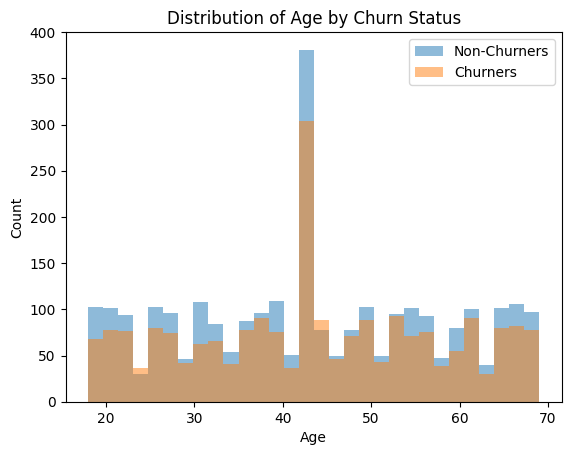

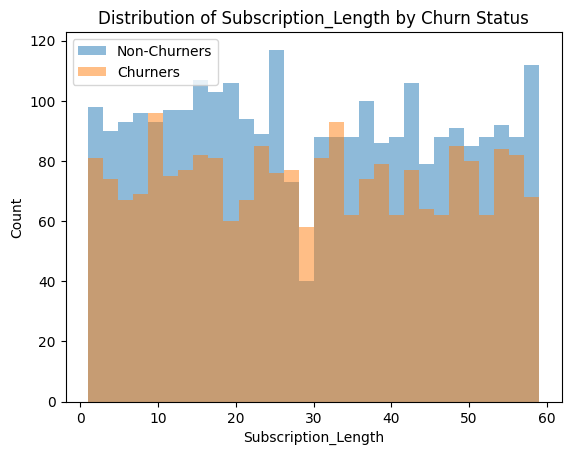

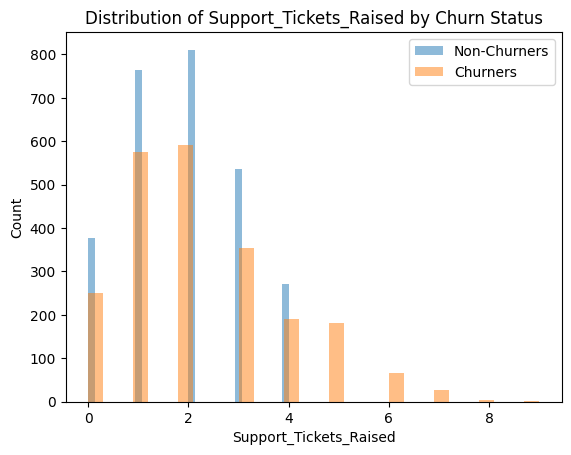

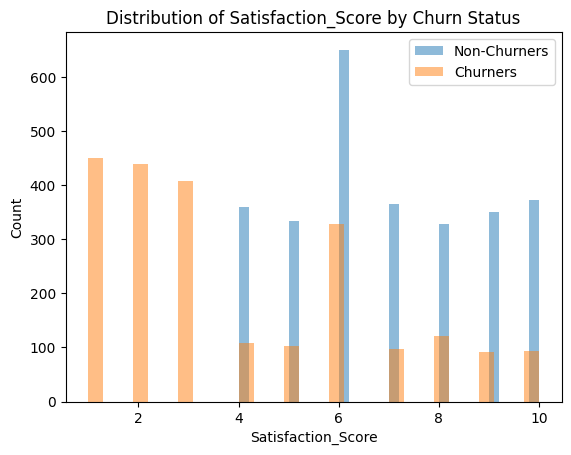

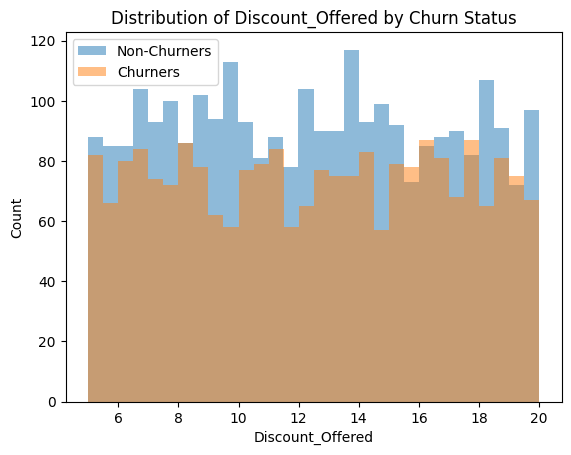

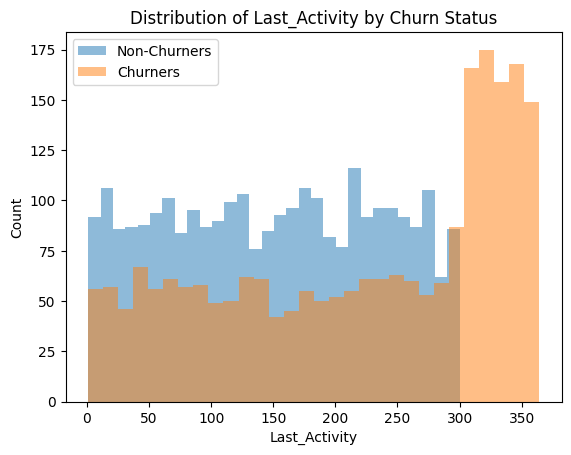

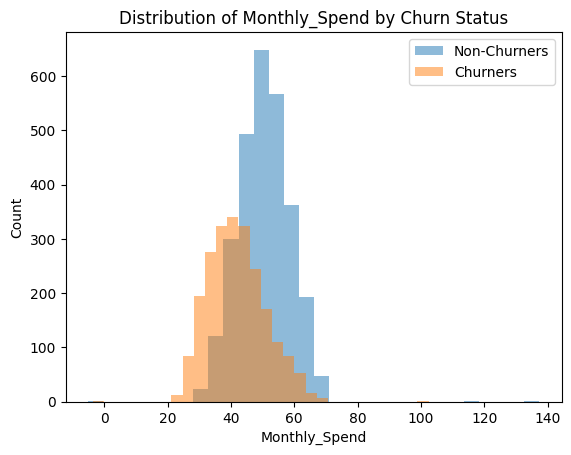

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Example lists of your numeric & categorical columns
numeric_cols = [
    "Age", 
    "Subscription_Length",
    "Support_Tickets_Raised",
    "Satisfaction_Score",
    "Discount_Offered",
    "Last_Activity",
    "Monthly_Spend"
]

categorical_cols = [
    "Gender",
    "Region",
    "Payment_Method"
]


#HISTOGRAMS FOR NUMERIC COLUMNS, SPLIT BY CHURN

for col in numeric_cols:
    # Separate data for churners (Churned=1) and non-churners (Churned=0)
    churners = df.loc[df["Churned"] == 1, col]
    non_churners = df.loc[df["Churned"] == 0, col]
    
    plt.figure()  # New figure for each plot
    
    # Plot non-churners
    plt.hist(non_churners, bins=30, alpha=0.5, label="Non-Churners")
    
    # Plot churners
    plt.hist(churners, bins=30, alpha=0.5, label="Churners")
    
    plt.title(f"Distribution of {col} by Churn Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.show()




Age: Younger vs. older might have different churn patterm depending on target demographic.

Subscription length: Churners often show a shorter subscription length, while non-churners cluster at longer durations. A shorter average subscription length for churners might indicate that customers who don't become royal subscribers leave early. This is a strong indicator.

Support Tickets Raised: We can see that sometimes, churners raise more support tickets (unsolved problems) or they might raise fewer tickets if they give up easiliy without seeking help.

Satisfaction Score: Typically, churners have lower satisfaction scores than non-churners. It is clear that dissatisfaction is a key driver of churn. 

Discount Offered: The distribution of discounts for churner and on-churner look similar, discount might not a major churn driver. 

Last Activity: Churners show a much higher value meaning they have not been actively using the product. It suggests that user engagement will tend to drop well before they decide to churn. 

Monthly Spend: Churners have a relatively low monthly spend on average, it suggests that loew product usage or engagement might lead to cancllation.



# Logistic Regression Modeling

In [14]:
# define contents of X and y
x_cat_cols = ['Gender','Region','Payment_Method']
x_num_cols = ['Age','Subscription_Length','Support_Tickets_Raised','Satisfaction_Score','Discount_Offered','Last_Activity','Monthly_Spend']
y_col = "Churned"

In [15]:
# construct the datasets for the classification
X = pd.concat([df[x_num_cols],pd.get_dummies(df[x_cat_cols],columns=x_cat_cols,drop_first=True)],axis=1)
y = df[y_col]

In [16]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


def t_predict(model, X, threshold):
    y_probs = model.predict_proba(X)[:, 1]
    return (y_probs >= threshold).astype(int)

# Make predictions
threshold = 0.5
y_tr_pred = t_predict(logreg,X_train,threshold)
y_te_pred = t_predict(logreg,X_test,threshold)
print(y_tr_pred,y_te_pred)

# Evaluate the model
print("Training Accuracy:",skm.accuracy_score(y_train, y_tr_pred))
print("Testing Accuracy:",skm.accuracy_score(y_test, y_te_pred))

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logreg.coef_[0]
})
print(coefficients)

[1 0 1 ... 1 1 0] [1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0
 0 0 0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[0.455 0.097]
 [0.092 0.356]]


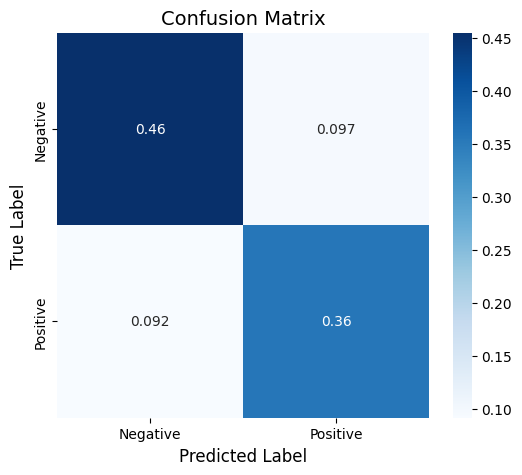

In [17]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_te_pred)
conf_matrix_prob = conf_matrix.astype(float) / conf_matrix.sum()

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_prob)

# Define class labels (modify if needed)
class_labels = ["Negative", "Positive"]

# Create heatmap with seaborn
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_prob, annot=True,  cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Formatting
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

True Negative (0.455): About 45.5% of the data are truly non-churners (negatives) and predicted as non-churners.

False Positive (0.097): approximately 9.7% are truly non-churners but the model predicted them as churners (positives).

False Negative (0.092): approximately 9.2% are actually churners but were predicted as non-churners.

True Positive (0.356): approximately 35.6% are actual churners correctly predicted as churners

Adding TN and Tp gives an approximate 81% overall accuracy 

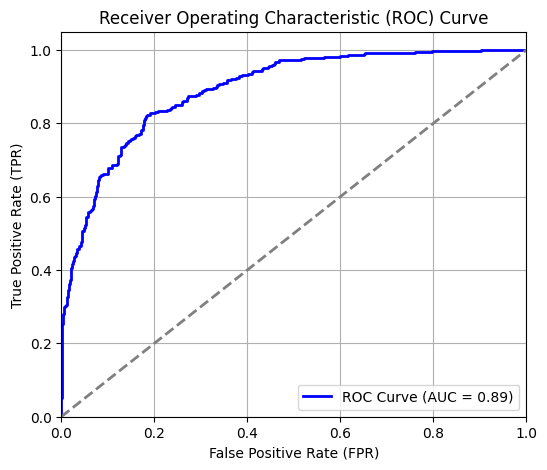

AUC Score: 0.89


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Determine predicted probabilities (scores)
y_probs = logreg.predict_proba(X_test)[:, 1] 

# Compute ROC curve
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under the Curve)
roc_auc = auc(lr_fpr, lr_tpr)

# Plot the ROC curve
plt.figure(figsize=(6,5))
plt.plot(lr_fpr, lr_tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")

The ROC curve is around 0.89, that means the model has am 89% chance of assigning a higher predicted probability of churn to a randomly chosen churner than to a randomly chosen non-churner. 

# Gradient Boosting 

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_test)


Confusion Matrix:
[[0.551 0.001]
 [0.005 0.443]]


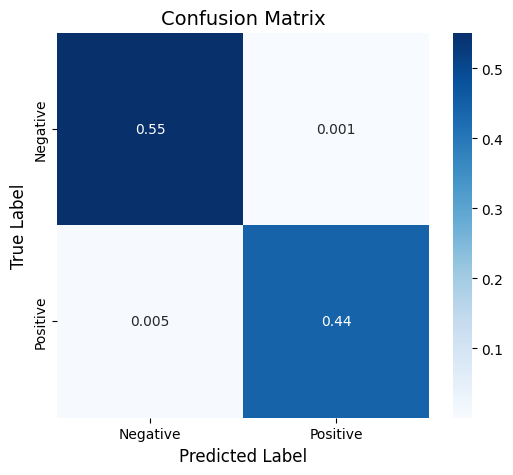

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_gb)
conf_matrix_prob = conf_matrix.astype(float) / conf_matrix.sum()

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_prob)

# Define class labels (modify if needed)
class_labels = ["Negative", "Positive"]

# Create heatmap with seaborn
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_prob, annot=True,  cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Formatting
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

True Negative (0.55): About 55% of the data are truly non-churners (negatives) and predicted as non-churners.

False Positive (0.001): approximately 1% are truly non-churners but the model predicted them as churners (positives).

False Negative (0.005): approximately 5% are actually churners but were predicted as non-churners.

True Positive (0.44): approximately 44% are actual churners correctly predicted as churners

Adding TN and Tp gives an approximate 99% overall accuracy 

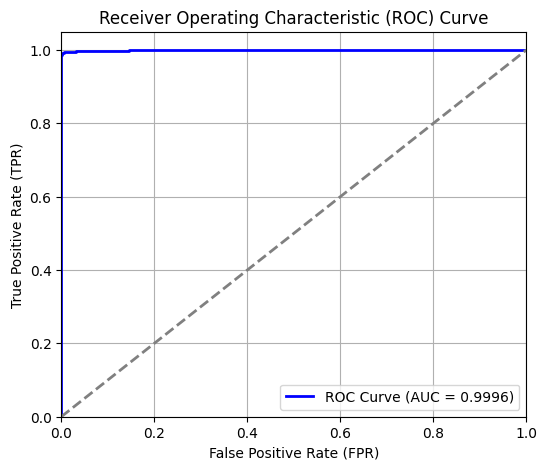

AUC Score: 0.9996


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Determine predicted probabilities (scores)
y_pred_probs_gb = gb.predict_proba(X_test)[:, 1] 

# Compute ROC curve
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred_probs_gb)

# Compute AUC (Area Under the Curve)
gb_auc = auc(gb_fpr, gb_tpr)

# Plot the ROC curve
plt.figure(figsize=(6,5))
plt.plot(gb_fpr, gb_tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {gb_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()

# Print AUC score
print(f"AUC Score: {gb_auc:.4f}")

The ROC curve shows an AUC of 0.996 which is extremely close to 1, suggesting that the mode nearly perfectly seperates churners from non-churners across all possible probability thresholds. 

# Compare Models 

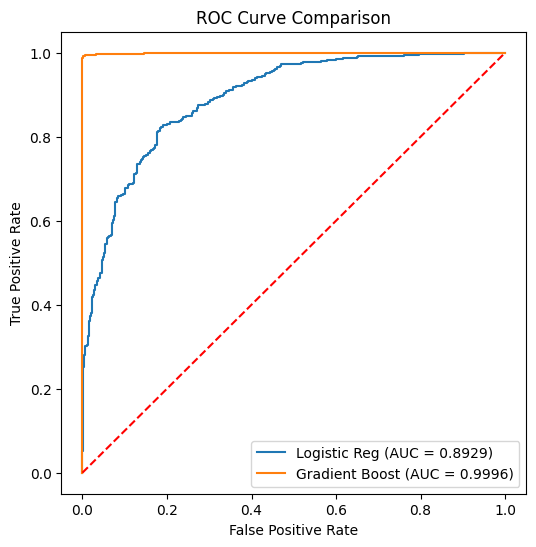

In [27]:
plt.figure(figsize=(6,6))

# Logistic Regression
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Reg (AUC = {roc_auc:.4f})')

# Gradient Boosting
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boost (AUC = {gb_auc:.4f})')

plt.plot([0,1],[0,1],'r--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Both models outperform random guessing (the dashed diagonal).

Gradient Boosting’s near-1.0 AUC is exceptionally high.This might arise from out small dataset.